You will be first shown a picture like this for 0.75 seconds


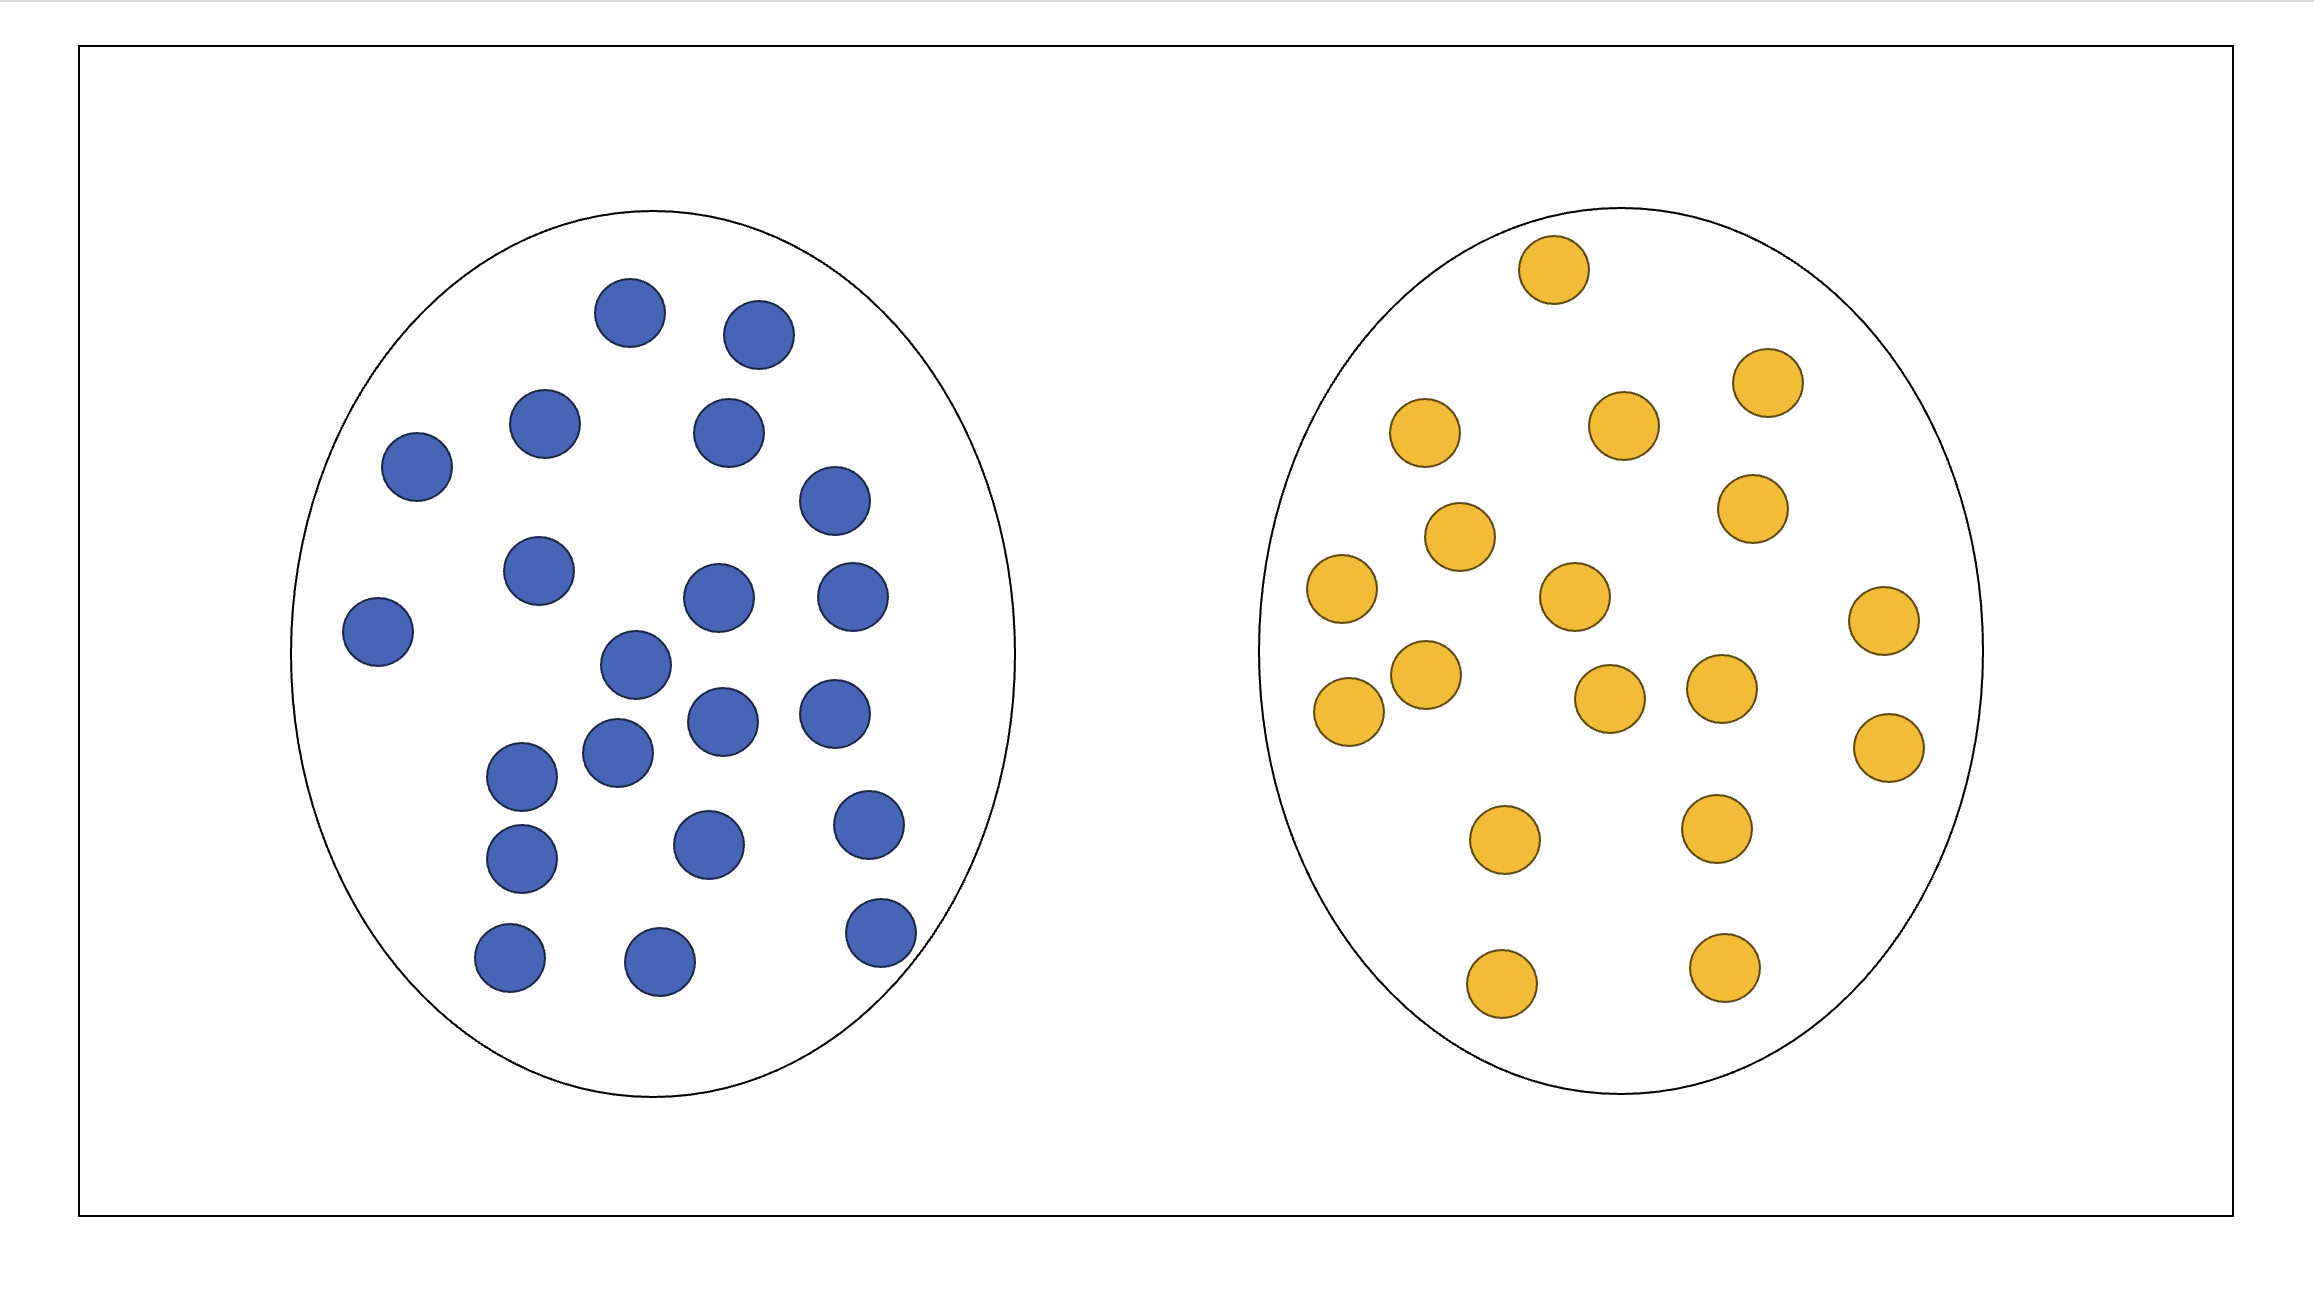

KeyboardInterrupt: 

In [3]:
from IPython.display import display, Image, clear_output, HTML
import time
import random
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from jupyter_ui_poll import ui_events
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json

def send_to_google_form(data_dict, form_url):
    
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
  
#button settings
event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()

    # set event info to be empty
    # as this is dict we can change entries
    # directly without using
    # the global keyword
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            # process UI events
            ui_poll(n_proc)

            # end loop if we have waited more than the timeout period
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
                
            # end loop if event has occured
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            # add pause before looping
            # to check events again
            time.sleep(interval)
    
    # return event description after wait ends
    # will be set to empty string '' if no event occured
    return event_info

# this function lets buttons 
# register events when clicked
def register_event(btn):
    # display button description in output area
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return

list_correct = []

def one_ANS_Test():
    picture1 = Image ("BIOSGW21-18.png", width = 1000)
    picture2 = Image ("BIOSGW20-15.png", width = 1000)
    picture3 = Image ("BIOSGW16-18.png", width = 1000)
    picture4 = Image ("BIOSGW9-10.png", width = 1000)
    picture5 = Image ("BIOSGW12-9.png", width = 1000)
    picture6 = Image ("BIOSGW12-16.png", width = 1000)
    picture7 = Image ("BIOSGW20-18.png", width = 1000)
    picture8 = Image ("BIOSGW14-12.png", width = 1000)
    picture9 = Image ("BIOSGW18-21.png", width = 1000)
    picture10 = Image ("BIOSGW15-20.png", width = 1000)
    picture11 = Image ("BIOSGW18-16.png", width = 1000)
    picture12 = Image ("BIOSGW10-9.png", width = 1000)
    picture13 = Image ("BIOSGW9-12.png", width = 1000)
    picture14 = Image ("BIOSGW16-12.png", width = 1000)
    picture15 = Image ("BIOSGW18-20.png", width = 1000)
    picture16 = Image ("BIOSGW12-14.png", width = 1000)

    mydict = {picture1:"Left", picture2:"Left",
              picture3:"Right", picture4:"Right",
              picture5:"Left", picture6:"Right",
              picture7:"Left", picture8:"Left",
              picture9:"Right", picture10:"Right",
              picture11:"Left", picture12:"Left",
              picture13:"Right", picture14:"Left",
              picture15:"Right", picture16:"Right"}

    picture_list = [picture1, picture2, picture3, picture4, picture5, picture6, picture7, picture8,
                   picture9, picture10, picture11, picture12, picture13, picture14, picture15, picture16]

    random.shuffle (picture_list)
    
    for i in range(len(picture_list)):
        display (picture_list[i])
        time.sleep (0.75)
        clear_output(wait=False)
        
        btn1 = widgets.Button(description="Left")
        btn2 = widgets.Button(description="Right")
    
        btn1.on_click(register_event) 
        btn2.on_click(register_event) 


        myhtml1 = HTML("<h1>Which side had more dots?</h1>")
        display(myhtml1)
        myhtml2 = HTML("<h2>You have 3 seconds to answer</h2>")
        display(myhtml2)

        panel = widgets.HBox([btn1, btn2])
        display(panel)

        result = wait_for_event(timeout=3)
        clear_output()

        if result['description']== mydict[picture_list[i]]:
            list_correct.append(1)
        else:
            print("time out")
            
        clear_output()

        time.sleep(1.5)

def ANS_test():

    your_name = ""
    your_name = input("This is the ANS test, enter your name here:") 
    
    print("Are you male or female?")
    btn10 = widgets.Button(description="Male")
    btn20 = widgets.Button(description="Female")
    btn10.on_click(register_event) 
    btn20.on_click(register_event) 
    panel = widgets.HBox([btn10, btn20])
    display(panel)
    result = wait_for_event()
    clear_output()
    your_sex = result['description']

    picture1 = Image ("BIOSGW21-18.png", width = 1000)
    print ("You will be first shown a picture like this for 0.75 seconds")
    time.sleep(2)
    display(picture1)
    time.sleep(2)

    clear_output(wait=False)

    print ("Then you have to answer which side has more dots")
    time.sleep(3)
    print ("You will be given 3 seconds to answer")
    time.sleep(2)
    print ("the test starts now")
    time.sleep(2)
    clear_output(wait=False)
    time.sleep(1.5)

    for i in range (3):
        one_ANS_Test()

    number = len(list_correct)

    print(f"You have answered {number} questions right out of 48")
    data_dict = {'score': number,
                'name': your_name,
                'sex': your_sex}
    form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSewGTHBj4Wc1h2csZLFXbwUhMhNHjrvPuqOeXZFRM9ewmqDag/viewform?vc=0&c=0&w=1&flr=0'
    send_to_google_form(data_dict, form_url)

ANS_test()